### This code provides: 

We thought of obtaining the physical equation by running SR using the most important features in 1) purely disk galaxies (to predict Rdisk/Rhalo) to obtain the eqn for disks, and 2) purely ellipticals (to predi Rbulge/Rhalo), to obtain the eqn for that morphology. Then we could merge the two results and hopefully have something that works for the morphologies in between.

    1) RF & Feature Ranking to predict $\frac{R_{disk}}{R_{halo}}$ by morphology: Group 1 Galaxies (purely disks), $\frac{M_{bulge}}{M_{star}}$ <0.1
    2) RF & Feature Ranking to predict $\frac{R_{bulge}}{R_{halo}}$ by morphology: Group 9 Galaxies (purely ellipticals), $\frac{M_{bulge}}{M_{star}}$ >0.8


In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

import target_predicting_ML_functions_and_feature_ranking as functions
import RF_target_predicting_and_learning_curves_functions as tp_lc_functions

#### <font color='purple'> [RF & Feature Ranking to predict $\frac{R_{disk}}{R_{halo}}$ by morphology: Group 1 Galaxies (purely disks), $\frac{M_{bulge}}{M_{star}}$<0.1](#1)
#### <font color='purple'> [RF & Feature Ranking to predict $\frac{R_{bulge}}{R_{halo}}$ by morphology: Group 9 Elliptical Galaxies, $\frac{M_{bulge}}{M_{star}}$>0.8](#2)
#### <font color='purple'> [ ](#3)
#### <font color='purple'> [ ](#4)
#### <font color='purple'> [ ](#5)
#### <font color='purple'> [ ](#6)
#### <font color='purple'> [ ](#7)

### <font color='purple'> <a id =1> </a> <br> RF & Feature Ranking to predict $\frac{R_{disk}}{R_{halo}}$ by morphology: Group 1 Galaxies (purely disks), $\frac{M_{bulge}}{M_{star}}$<0.1

In [2]:
import os
# os.mkdir('TNG300-SAM_images/v13_TNG300-SAM_df_1')

In [4]:
df_1 = pd.read_csv('TNG300-SAM_images/v12_TNG300-SAM_Rdiskpredict_cleanup_normalize_dataset/df_1_Normalized_as_defined_in_TNG300notebook_v12')
df_1_raw = pd.read_csv('TNG300-SAM_images/v12_TNG300-SAM_Rdiskpredict_cleanup_normalize_dataset/df_1_Raw_as_defined_in_TNG300notebook_v12')
print("df_1.shape", df_1.shape)
print("df_1_raw.shape", df_1_raw.shape)

df_1.shape (52053, 40)
df_1_raw.shape (52053, 59)


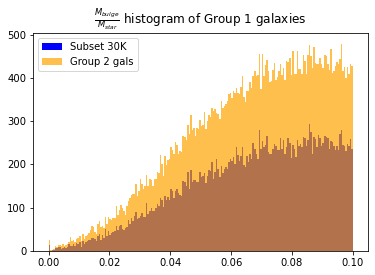

In [11]:
df_1_sample = df_1.sample(n = 30000, random_state = 2023)

plt.hist(df_1_sample.BulgeMstar_ratio, color='blue', label='Subset 30K', range=(0.0,0.1), bins=200)
plt.hist(df_1.BulgeMstar_ratio,  color='orange', 
         label='Group 2 gals', alpha=0.7, range=(0.0,0.1), bins=200)
plt.title(r'$\frac{M_{bulge}}{M_{star}}$ histogram of Group 1 galaxies')
plt.legend()
# plt.savefig('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_df_1_BulgeMstar_ratio_histogram_all_vs_30kdataset.jpeg', dpi=500)
plt.show()

In [27]:
# NOTE: For this run, NormRbulge was inclued in the available features. However, NormRbulge does not appear
# anywhere in the feature ranking - hence, I assume it has no effect whatsoever, and therefore I do not have 
# to run the code again in order to see what changes when NormRbulge is not included in the feature space.

X_1_sample = df_1_sample.drop(columns=['GalpropNormRdisk', 'GalpropNormHalfRadius', 'BulgeMstar_ratio',
                         'GalpropNormMdisk', 'DiskMstar_ratio'])
 

y_1_sample = df_1_sample.loc[:,'GalpropNormRdisk']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.9910 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.99 (+/- 0.02)


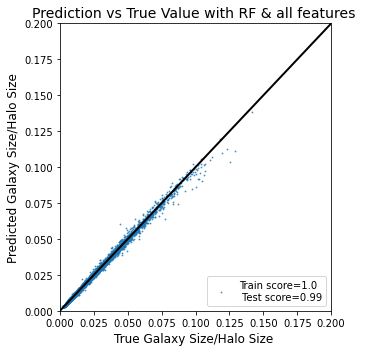

Elapsed time to compute the importances: 0.056 seconds


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Elapsed time to compute the importances: 36.024 seconds


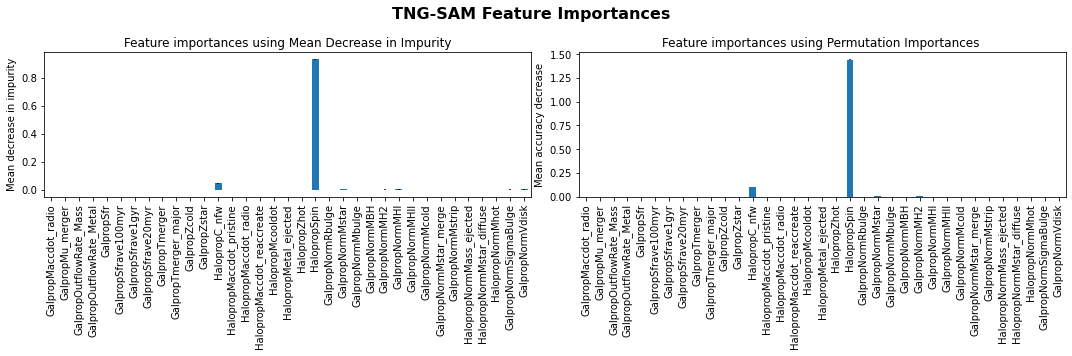

  0%|                                                    | 0/35 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  3%|█▎                                          | 1/35 [00:02<01:26,  2.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 2/35 [00:09<02:41,  4.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▊                                        | 3/35 [00:14<02:49,  5.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|█████                                       | 4/35 [00:20<02:48,  5.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 5/35 [00:26<02:51,  5.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 6/35 [00:32<02:50,  5.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 7/35 [00:38<02:45,  5.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████                                  | 8/35 [00:45<02:42,  6.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 9/35 [00:48<02:16,  5.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▎                              | 10/35 [00:51<01:49,  4.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                             | 11/35 [00:57<02:01,  5.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▋                            | 12/35 [01:03<02:02,  5.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 13/35 [01:08<01:54,  5.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 14/35 [01:12<01:43,  4.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 15/35 [01:15<01:25,  4.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▋                       | 16/35 [01:21<01:31,  4.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 49%|████████████████████▉                      | 17/35 [01:26<01:28,  4.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 51%|██████████████████████                     | 18/35 [01:32<01:29,  5.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▎                   | 19/35 [01:38<01:25,  5.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 20/35 [01:42<01:15,  5.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 21/35 [01:48<01:12,  5.14s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 22/35 [01:53<01:08,  5.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▎              | 23/35 [01:58<01:02,  5.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▍             | 24/35 [02:00<00:44,  4.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 25/35 [02:07<00:48,  4.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 26/35 [02:12<00:44,  4.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▏         | 27/35 [02:17<00:40,  5.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 28/35 [02:22<00:35,  5.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▋       | 29/35 [02:27<00:30,  5.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 30/35 [02:28<00:18,  3.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████     | 31/35 [02:33<00:16,  4.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▎   | 32/35 [02:36<00:11,  3.94s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▌  | 33/35 [02:42<00:08,  4.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▊ | 34/35 [02:47<00:04,  4.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 35/35 [02:52<00:00,  4.93s/it]


1. iteration: 
	 1 HalopropSpin 0.9293592541612075


  0%|                                                    | 0/34 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/34 [00:07<04:01,  7.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 2/34 [00:14<04:00,  7.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▉                                        | 3/34 [00:23<04:00,  7.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▏                                      | 4/34 [00:31<03:57,  7.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▍                                     | 5/34 [00:39<03:51,  7.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 6/34 [00:46<03:35,  7.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 7/34 [00:53<03:22,  7.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 8/34 [01:01<03:20,  7.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▋                                | 9/34 [01:08<03:07,  7.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▋                              | 10/34 [01:14<02:44,  6.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▉                             | 11/34 [01:23<02:52,  7.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                           | 12/34 [01:30<02:44,  7.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▍                          | 13/34 [01:39<02:45,  7.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▋                         | 14/34 [01:45<02:29,  7.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 15/34 [01:53<02:21,  7.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 16/34 [02:02<02:22,  7.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 17/34 [02:08<02:08,  7.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 18/34 [02:17<02:03,  7.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 19/34 [02:24<01:56,  7.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 20/34 [02:32<01:49,  7.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 21/34 [02:41<01:46,  8.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 22/34 [02:48<01:33,  7.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████              | 23/34 [02:55<01:22,  7.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 24/34 [03:04<01:19,  7.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▌           | 25/34 [03:13<01:13,  8.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 26/34 [03:21<01:04,  8.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████▏        | 27/34 [03:29<00:56,  8.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 28/34 [03:36<00:47,  7.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 29/34 [03:40<00:33,  6.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 30/34 [03:49<00:29,  7.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▏   | 31/34 [03:56<00:21,  7.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 32/34 [04:05<00:15,  7.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 33/34 [04:14<00:08,  8.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 34/34 [04:23<00:00,  7.74s/it]


2. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253


  0%|                                                    | 0/33 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/33 [00:13<07:15, 13.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▋                                         | 2/33 [00:23<05:53, 11.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 3/33 [00:37<06:17, 12.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 4/33 [00:51<06:19, 13.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▋                                     | 5/33 [01:02<05:51, 12.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 6/33 [01:16<05:50, 12.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▎                                  | 7/33 [01:30<05:44, 13.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▋                                 | 8/33 [01:44<05:35, 13.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 9/33 [01:56<05:09, 12.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                              | 10/33 [02:06<04:38, 12.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 11/33 [02:20<04:36, 12.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▋                           | 12/33 [02:33<04:31, 12.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 13/33 [02:43<03:59, 11.99s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 14/33 [02:57<03:56, 12.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 15/33 [03:10<03:50, 12.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 16/33 [03:24<03:42, 13.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 17/33 [03:38<03:31, 13.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 18/33 [03:51<03:20, 13.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 19/33 [04:04<03:04, 13.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 20/33 [04:18<02:52, 13.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 21/33 [04:30<02:37, 13.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 22/33 [04:43<02:21, 12.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 23/33 [04:56<02:11, 13.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 24/33 [05:07<01:52, 12.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 25/33 [05:20<01:40, 12.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 26/33 [05:33<01:28, 12.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 27/33 [05:46<01:15, 12.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 28/33 [05:54<00:57, 11.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 29/33 [06:06<00:46, 11.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 30/33 [06:19<00:35, 11.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 31/33 [06:31<00:24, 12.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 32/33 [06:41<00:11, 11.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 33/33 [06:54<00:00, 12.55s/it]


3. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253
	 3 GalpropSfr 0.9892164852041736


  0%|                                                    | 0/32 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/32 [00:17<09:06, 17.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/32 [00:35<08:51, 17.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████▏                                       | 3/32 [00:53<08:38, 17.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 4/32 [01:11<08:20, 17.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|██████▉                                     | 5/32 [01:25<07:30, 16.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 6/32 [01:43<07:24, 17.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▋                                  | 7/32 [01:56<06:33, 15.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 8/32 [02:13<06:28, 16.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▍                               | 9/32 [02:26<05:48, 15.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▍                             | 10/32 [02:44<05:52, 16.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 11/32 [02:59<05:28, 15.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▏                          | 12/32 [03:16<05:19, 15.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▍                         | 13/32 [03:33<05:12, 16.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▊                        | 14/32 [03:51<05:03, 16.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 15/32 [04:09<04:50, 17.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 16/32 [04:27<04:37, 17.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 17/32 [04:45<04:22, 17.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▏                  | 18/32 [04:58<03:46, 16.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▌                 | 19/32 [05:13<03:25, 15.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 20/32 [05:31<03:17, 16.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 21/32 [05:48<03:05, 16.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 22/32 [06:06<02:51, 17.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 23/32 [06:24<02:36, 17.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 24/32 [06:42<02:20, 17.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▌         | 25/32 [06:57<01:56, 16.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 26/32 [07:15<01:42, 17.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▎      | 27/32 [07:29<01:20, 16.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 28/32 [07:43<01:02, 15.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|██████████████████████████████████████▉    | 29/32 [08:01<00:49, 16.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 30/32 [08:19<00:33, 16.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 31/32 [08:37<00:17, 17.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 32/32 [08:55<00:00, 16.73s/it]


4. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253
	 3 GalpropSfr 0.9892164852041736
	 4 GalpropNormMHI 0.9904347477067876


  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:21<10:44, 21.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:43<10:26, 21.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [01:04<10:07, 21.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [01:23<09:07, 20.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [01:44<09:01, 20.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [02:06<08:49, 21.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [02:28<08:32, 21.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [02:49<08:08, 21.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [03:08<07:35, 20.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [03:30<07:22, 21.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [03:52<07:06, 21.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [04:13<06:40, 21.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [04:34<06:22, 21.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [04:56<06:04, 21.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [05:12<05:15, 19.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [05:34<05:07, 20.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [05:56<04:52, 20.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [06:18<04:35, 21.22s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [06:40<04:16, 21.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [07:02<03:58, 21.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [07:20<03:25, 20.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [07:38<02:58, 19.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [08:00<02:44, 20.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [08:22<02:26, 20.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [08:40<02:00, 20.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [08:59<01:37, 19.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [09:21<01:21, 20.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [09:43<01:02, 20.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [10:04<00:42, 21.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [10:20<00:19, 19.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [10:42<00:00, 20.73s/it]


5. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253
	 3 GalpropSfr 0.9892164852041736
	 4 GalpropNormMHI 0.9904347477067876
	 5 GalpropNormMstar 0.991289208005597


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:25<12:19, 25.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:44<10:01, 21.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [01:10<10:38, 23.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [01:36<10:38, 24.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [02:02<10:25, 25.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [02:27<10:06, 25.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [02:49<09:11, 23.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [03:14<08:55, 24.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [03:37<08:25, 24.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [03:59<07:44, 23.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [04:25<07:36, 24.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [04:49<07:15, 24.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [05:10<06:35, 23.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [05:32<06:04, 22.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [05:58<05:55, 23.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [06:23<05:40, 24.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [06:49<05:22, 24.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [07:11<04:45, 23.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [07:37<04:29, 24.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [08:02<04:07, 24.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [08:24<03:33, 23.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 22/30 [08:50<03:15, 24.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [09:15<02:53, 24.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [09:37<02:22, 23.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 25/30 [09:59<01:56, 23.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 26/30 [10:25<01:36, 24.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 27/30 [10:50<01:13, 24.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [11:16<00:49, 24.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [11:42<00:25, 25.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [12:04<00:00, 24.14s/it]


6. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253
	 3 GalpropSfr 0.9892164852041736
	 4 GalpropNormMHI 0.9904347477067876
	 5 GalpropNormMstar 0.991289208005597
	 6 GalpropMaccdot_radio 0.9915300265075876


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:29<13:40, 29.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:53<11:54, 26.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [01:23<12:03, 27.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [01:52<11:51, 28.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [02:16<10:47, 26.96s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [02:46<10:38, 27.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [03:14<10:16, 28.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [03:41<09:41, 27.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [04:02<08:33, 25.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [04:32<08:31, 26.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [05:00<08:11, 27.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [05:29<07:51, 27.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [05:58<07:31, 28.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [06:27<07:06, 28.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [06:52<06:20, 27.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [07:16<05:42, 26.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [07:46<05:28, 27.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [08:15<05:07, 27.93s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [08:44<04:42, 28.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [09:13<04:17, 28.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [09:43<03:50, 28.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [10:12<03:22, 28.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [10:41<02:54, 29.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [11:07<02:19, 27.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [11:36<01:53, 28.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [12:06<01:26, 28.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [12:36<00:58, 29.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 28/29 [13:06<00:29, 29.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 29/29 [13:35<00:00, 28.11s/it]


7. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253
	 3 GalpropSfr 0.9892164852041736
	 4 GalpropNormMHI 0.9904347477067876
	 5 GalpropNormMstar 0.991289208005597
	 6 GalpropMaccdot_radio 0.9915300265075876
	 7 HalopropMaccdot_reaccreate 0.9917420308229205


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▌                                          | 1/28 [00:33<14:58, 33.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [01:06<14:25, 33.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 3/28 [01:39<13:50, 33.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [02:07<12:21, 30.91s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [02:40<12:11, 31.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [03:13<11:51, 32.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [03:46<11:19, 32.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [04:11<10:03, 30.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [04:45<09:51, 31.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [05:18<09:31, 31.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [05:44<08:33, 30.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [06:17<08:15, 30.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [06:50<07:53, 31.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [07:23<07:28, 32.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [07:56<07:01, 32.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [08:24<06:11, 30.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [08:57<05:48, 31.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [09:30<05:20, 32.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [10:03<04:51, 32.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [10:37<04:21, 32.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [11:04<03:37, 31.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [11:38<03:10, 31.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [12:07<02:35, 31.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [12:40<02:06, 31.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [13:08<01:31, 30.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [13:35<00:59, 29.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [14:09<00:30, 30.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [14:42<00:00, 31.51s/it]


8. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253
	 3 GalpropSfr 0.9892164852041736
	 4 GalpropNormMHI 0.9904347477067876
	 5 GalpropNormMstar 0.991289208005597
	 6 GalpropMaccdot_radio 0.9915300265075876
	 7 HalopropMaccdot_reaccreate 0.9917420308229205
	 8 HalopropZhot 0.991515405520098


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:37<16:05, 37.13s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [01:14<15:30, 37.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [01:51<14:50, 37.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [02:28<14:11, 37.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [03:05<13:34, 37.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [03:42<12:57, 37.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [04:12<11:34, 34.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [04:47<11:02, 34.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 9/27 [05:18<10:04, 33.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 10/27 [05:49<09:16, 32.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [06:25<09:01, 33.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████                        | 12/27 [07:02<08:40, 34.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [07:38<08:14, 35.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 14/27 [08:16<07:46, 35.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [08:53<07:15, 36.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [09:30<06:42, 36.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [10:07<06:06, 36.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [10:44<05:30, 36.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [11:15<04:40, 35.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [11:52<04:09, 35.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [12:29<03:36, 36.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [12:57<02:47, 33.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [13:28<02:10, 32.73s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [14:05<01:42, 34.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [14:42<01:09, 34.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [15:19<00:35, 35.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [15:50<00:00, 35.20s/it]


9. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253
	 3 GalpropSfr 0.9892164852041736
	 4 GalpropNormMHI 0.9904347477067876
	 5 GalpropNormMstar 0.991289208005597
	 6 GalpropMaccdot_radio 0.9915300265075876
	 7 HalopropMaccdot_reaccreate 0.9917420308229205
	 8 HalopropZhot 0.991515405520098
	 9 GalpropOutflowRate_Mass 0.9914976589412848


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:41<17:08, 41.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [01:15<14:45, 36.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [01:56<14:53, 38.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [02:37<14:33, 39.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [03:18<14:03, 40.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [03:58<13:23, 40.17s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [04:37<12:33, 39.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [05:17<12:01, 40.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [05:47<10:25, 36.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [06:27<10:04, 37.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [07:08<09:39, 38.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [07:41<08:40, 37.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [08:23<08:18, 38.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [09:04<07:51, 39.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 15/26 [09:45<07:18, 39.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▍                | 16/26 [10:26<06:40, 40.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 17/26 [11:07<06:02, 40.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [11:47<05:23, 40.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▍           | 19/26 [12:21<04:29, 38.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████          | 20/26 [13:03<03:56, 39.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 21/26 [13:40<03:13, 38.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 22/26 [14:21<02:37, 39.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [14:55<01:53, 37.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [15:36<01:17, 38.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [16:17<00:39, 39.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [16:59<00:00, 39.19s/it]

10. iteration: 
	 1 HalopropSpin 0.9293592541612075
	 2 HalopropC_nfw 0.9809384172196253
	 3 GalpropSfr 0.9892164852041736
	 4 GalpropNormMHI 0.9904347477067876
	 5 GalpropNormMstar 0.991289208005597
	 6 GalpropMaccdot_radio 0.9915300265075876
	 7 HalopropMaccdot_reaccreate 0.9917420308229205
	 8 HalopropZhot 0.991515405520098
	 9 GalpropOutflowRate_Mass 0.9914976589412848
	 10 HalopropNormMhot 0.9915044417583542


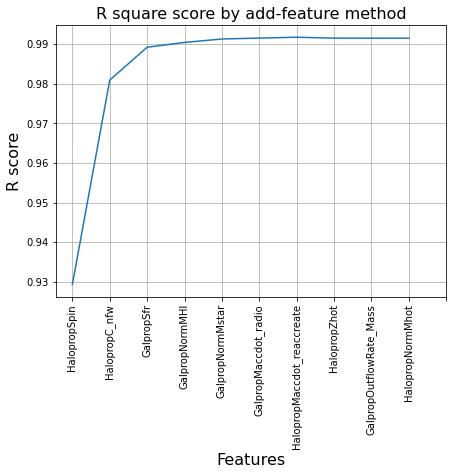

Elapsed time to run RF func on Group 1: 7284.017 seconds


In [28]:
# this code takes ... seconds ~ ..min to run when the dataset is Group 1 galaxies with randomly
# selected 30,000 entries
# and searching for 10 most important features
start_time = time.time()

RF_results_1 = functions.target_predicting_RF_function(X=X_1_sample, y=y_1_sample)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Group 1: {elapsed_time:.3f} seconds")

##### RF best parameters for Group 1, Galaxies with $\frac{M_{bulge}}{M_{star}}$<0.1, to predict $\frac{R_{disk}}{R_{halo}}$:

    Fitting 5 folds for each of 27 candidates, totalling 135 fits
    Best params, best score: 0.8329 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
    RF Accuracy: 0.83 (+/- 0.03)


#### The most important features for Group 1 galaxies to predict $\frac{R_{disk}}{R_{halo}}$ are: 

	 1 GalpropNormSigmaBulge 0.4052934568211361
	 2 GalpropNormMstar 0.6040781082496883
	 3 GalpropNormMHII 0.768888785529549
	 4 HalopropC_nfw 0.8110192229923593
	 5 GalpropMu_merger 0.8227236630375273
	 6 HalopropSpin 0.8299002809259548
	 7 GalpropOutflowRate_Metal 0.8349386048016791
	 8 GalpropOutflowRate_Mass 0.8359605481393695
	 9 GalpropTmerger 0.8373681090424014
	 10 HalopropMaccdot_pristine 0.8377058655549435


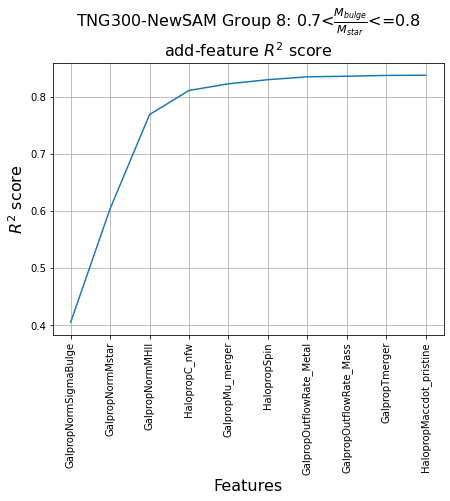

In [6]:
group1_fig_add_feature=RF_results_1[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,10))
group1_fig_add_feature.set_title(label= r'TNG300-NewSAM Group 1: $\frac{M_{bulge}}{M_{star}}$<=0.1' + '\n' + r'add-feature $R^{2}$ score, predict $\frac{R_{disk}}{R_{halo}}$',fontsize=16)
group1_fig_add_feature.set_xlabel('Features',fontsize=16)
group1_fig_add_feature.set_ylabel(r'$R^{2}$ score',fontsize=16)

# group1_fig_add_feature.get_figure().savefig('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_TNG300_Group_1_R_score_by_add_feature_method_Rdiskpred.jpg', dpi=500)

plt.show()

In [7]:
# RF_results_8[4].to_csv('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_TNG300_Group_1_Max_r_scores_by_add_column_method_Rdiskpred.csv', index=False)

group1 = pd.read_csv('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_TNG300_Group_1_Max_r_scores_by_add_column_method_Rdiskpred.csv')

group1_fig = RF_results_1[1]
# group8_fig.savefig('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_TNG300_Group_1_RF_Prediction_vs_True_Rdiskpred.jpeg', dpi=500)
plt.show()

group8_fig_builtin_imp = RF_results_1[2]
# group8_fig_builtin_imp.savefig('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_TNG300_Group_1_Built_in_Feature_Ranking_Rdiskpred.jpeg', dpi=500)
plt.show()

In [8]:
# y_pred_RF_df_1 = RF_results_1[0]
# y_pred_RF_df_1 = pd.DataFrame({'y_pred_Rdisk_RF Group 1': y_pred_RF_df_1})

# y_pred_RF_df_1.to_csv('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_TNG300-NewSAM_Group_1_y_pred_RF_predicted_Rdisk.csv', index=False)

y_pred_RF_1 = pd.read_csv('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_TNG300-NewSAM_Group_1_y_pred_RF_predicted_Rdisk.csv')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.8324 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
RF Accuracy: 0.83 (+/- 0.03)


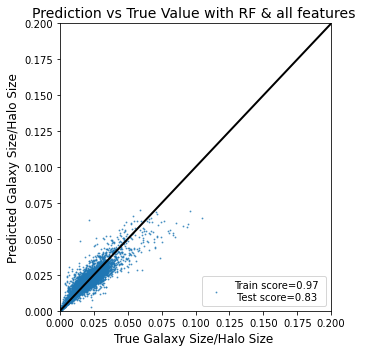

Elapsed time to compute the importances: 0.007 seconds
Elapsed time to compute the importances: 6.170 seconds


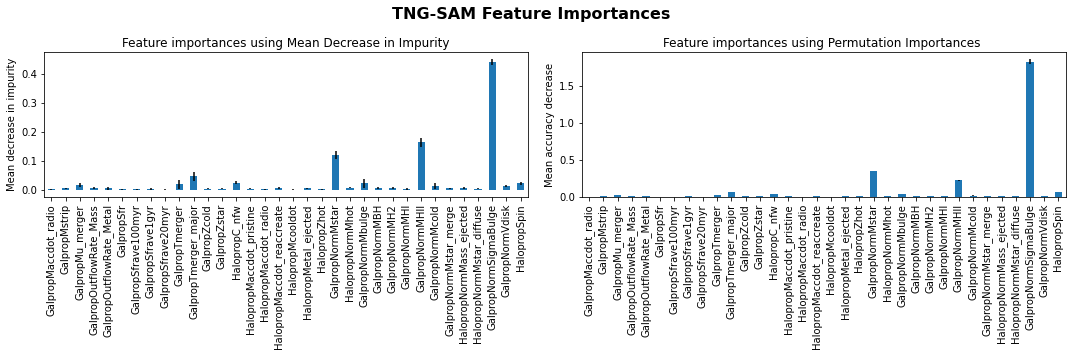

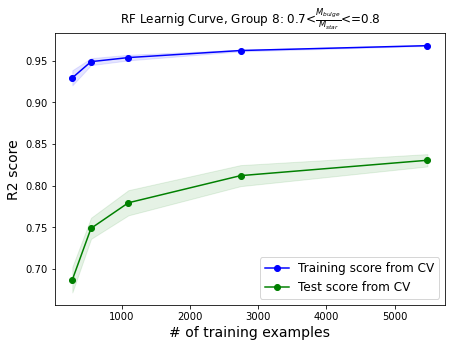

Elapsed time to run RF func and Learning Curves on Group 8 (0.7<B/M<=0.8): 164.300 seconds


In [9]:
# this code takes 164 seconds ~ 3min to run when the dataset is Group 8 galaxies with ~7,000 entries
start_time = time.time()

RF_lc_1 = tp_lc_functions.target_predicting_RF_function(X_1_sample, y_1_sample, r'RF Learnig Curve for $\frac{R_{disk}}{R_{halo}}$, Group 1: $\frac{M_{bulge}}{M_{star}}$<=0.1')

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func and Learning Curves on Group 1 (B/M<=0.1): {elapsed_time:.3f} seconds")

In [10]:
lc_1 = RF_lc_1[4]
# lc_1.savefig('TNG300-SAM_images/v13_TNG300-SAM_df_1/v13_TNG300_Group_1_RF_Learning_Curve_Rdiskpred.jpeg', dpi=500)

### <font color='purple'> <a id =2> </a> <br> RF & Feature Ranking to predict $\frac{R_{bulge}}{R_{halo}}$ by morphology: Group 9 Elliptical Galaxies, $\frac{M_{bulge}}{M_{star}}$>0.8

In [3]:
import os
# os.mkdir('TNG300-SAM_images/v13_TNG300-SAM_df_9')

In [6]:
df_9 = pd.read_csv('TNG300-SAM_images/v12_TNG300-SAM_Rdiskpredict_cleanup_normalize_dataset/df_9_Normalized_as_defined_in_TNG300notebook_v12')
df_9_raw = pd.read_csv('TNG300-SAM_images/v12_TNG300-SAM_Rdiskpredict_cleanup_normalize_dataset/df_9_Raw_as_defined_in_TNG300notebook_v12')
print("df_9.shape", df_9.shape)
print("df_9_raw.shape", df_9_raw.shape)

df_9.shape (10040, 40)
df_9_raw.shape (10040, 59)


In [7]:
df_9.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['GalpropMaccdot_radio', 'GalpropMu_merger', 'GalpropOutflowRate_Mass',
       'GalpropOutflowRate_Metal', 'GalpropSfr', 'GalpropSfrave100myr',
       'GalpropSfrave1gyr', 'GalpropSfrave20myr', 'GalpropTmerger',
       'GalpropTmerger_major', 'GalpropZcold', 'GalpropZstar', 'HalopropC_nfw',
       'HalopropMaccdot_pristine', 'HalopropMaccdot_radio',
       'HalopropMaccdot_reaccreate', 'HalopropMcooldot',
       'HalopropMetal_ejected', 'HalopropZhot', 'BulgeMstar_ratio',
       'DiskMstar_ratio', 'HalopropSpin', 'GalpropNormHalfRadius',
       'GalpropNormRdisk', 'GalpropNormRbulge', 'GalpropNormMstar',
       'GalpropNormMbulge', 'GalpropNormMdisk', 'GalpropNormMBH',
       'GalpropNormMH2', 'GalpropNormMHI', 'GalpropNormMHII',
       'GalpropNormMcold', 'GalpropNormMstar_merge', 'GalpropNormMstrip',
       'HalopropNormMass_ejected', 'HalopropNormMstar_diffuse',
       'HalopropNormMhot', 'GalpropNormSigmaBulge', 'GalpropNormVdisk'],
     

In [8]:
# Should I remove Rdisk from the feature list when predicting Rbulge?
# Yes, if we want to predict Rdisk/Rhalo in order to find the physical equation, I should remove Rbulge from feature space.
X_9 = df_9.drop(columns=['GalpropNormRbulge', 'GalpropNormHalfRadius', 'BulgeMstar_ratio',
                         'GalpropNormMdisk', 'DiskMstar_ratio',
                        'GalpropNormRdisk'])
 

y_9 = df_9.loc[:,'GalpropNormRbulge']

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.7268 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
RF Accuracy: 0.73 (+/- 0.05)


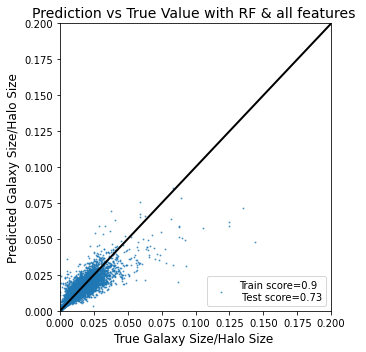

Elapsed time to compute the importances: 0.020 seconds
Elapsed time to compute the importances: 7.454 seconds


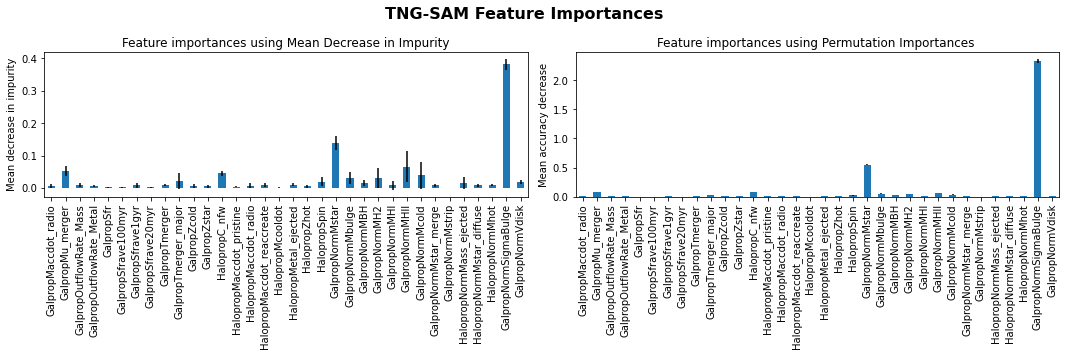

  0%|                                                    | 0/34 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/34 [00:01<00:50,  1.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▌                                         | 2/34 [00:03<00:49,  1.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|███▉                                        | 3/34 [00:04<00:47,  1.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▏                                      | 4/34 [00:06<00:46,  1.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▍                                     | 5/34 [00:07<00:45,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 6/34 [00:09<00:44,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 7/34 [00:10<00:42,  1.58s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▎                                 | 8/34 [00:12<00:41,  1.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▋                                | 9/34 [00:13<00:37,  1.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▋                              | 10/34 [00:15<00:34,  1.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▉                             | 11/34 [00:16<00:35,  1.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                           | 12/34 [00:18<00:33,  1.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▍                          | 13/34 [00:20<00:32,  1.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▋                         | 14/34 [00:21<00:27,  1.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 15/34 [00:22<00:27,  1.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 16/34 [00:24<00:28,  1.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 17/34 [00:25<00:21,  1.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 18/34 [00:26<00:21,  1.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 19/34 [00:28<00:21,  1.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▎                 | 20/34 [00:29<00:20,  1.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▌                | 21/34 [00:31<00:19,  1.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▊               | 22/34 [00:33<00:19,  1.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████              | 23/34 [00:34<00:16,  1.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▎            | 24/34 [00:35<00:13,  1.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▌           | 25/34 [00:37<00:12,  1.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▉          | 26/34 [00:38<00:11,  1.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████▏        | 27/34 [00:40<00:10,  1.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▍       | 28/34 [00:41<00:09,  1.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 29/34 [00:42<00:05,  1.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▉     | 30/34 [00:43<00:05,  1.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████▏   | 31/34 [00:45<00:04,  1.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 32/34 [00:46<00:02,  1.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 33/34 [00:48<00:01,  1.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 34/34 [00:49<00:00,  1.47s/it]


1. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149


  0%|                                                    | 0/33 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▎                                          | 1/33 [00:02<01:12,  2.25s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▋                                         | 2/33 [00:04<01:11,  2.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████                                        | 3/33 [00:07<01:13,  2.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 4/33 [00:09<01:09,  2.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▋                                     | 5/33 [00:12<01:10,  2.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|████████                                    | 6/33 [00:14<01:07,  2.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▎                                  | 7/33 [00:17<01:04,  2.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▋                                 | 8/33 [00:19<01:03,  2.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|████████████                                | 9/33 [00:22<01:00,  2.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                              | 10/33 [00:24<00:56,  2.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 11/33 [00:26<00:53,  2.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▋                           | 12/33 [00:29<00:52,  2.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 13/33 [00:31<00:48,  2.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 14/33 [00:33<00:43,  2.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▌                       | 15/33 [00:36<00:42,  2.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 16/33 [00:39<00:41,  2.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 17/33 [00:40<00:34,  2.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▍                   | 18/33 [00:43<00:34,  2.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 19/33 [00:45<00:32,  2.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 20/33 [00:48<00:31,  2.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▎               | 21/33 [00:50<00:27,  2.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 22/33 [00:52<00:25,  2.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|█████████████████████████████▉             | 23/33 [00:54<00:23,  2.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▎           | 24/33 [00:57<00:20,  2.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 25/33 [00:59<00:19,  2.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▉         | 26/33 [01:02<00:17,  2.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▏       | 27/33 [01:04<00:14,  2.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 28/33 [01:06<00:11,  2.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 29/33 [01:08<00:08,  2.11s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|███████████████████████████████████████    | 30/33 [01:10<00:06,  2.26s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▍  | 31/33 [01:13<00:04,  2.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 32/33 [01:15<00:02,  2.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 33/33 [01:18<00:00,  2.38s/it]


2. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111


  0%|                                                    | 0/32 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/32 [00:03<01:59,  3.87s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/32 [00:07<01:56,  3.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  9%|████▏                                       | 3/32 [00:11<01:52,  3.88s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▌                                      | 4/32 [00:15<01:48,  3.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|██████▉                                     | 5/32 [00:19<01:43,  3.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▎                                   | 6/32 [00:23<01:40,  3.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▋                                  | 7/32 [00:26<01:35,  3.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 8/32 [00:30<01:27,  3.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▍                               | 9/32 [00:33<01:20,  3.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▍                             | 10/32 [00:37<01:18,  3.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 11/32 [00:40<01:13,  3.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▏                          | 12/32 [00:44<01:12,  3.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▍                         | 13/32 [00:48<01:09,  3.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▊                        | 14/32 [00:51<01:04,  3.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████▏                      | 15/32 [00:55<01:02,  3.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 16/32 [00:59<00:59,  3.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▊                    | 17/32 [01:02<00:51,  3.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████▏                  | 18/32 [01:05<00:49,  3.56s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▌                 | 19/32 [01:09<00:47,  3.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▉                | 20/32 [01:13<00:42,  3.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 21/32 [01:16<00:39,  3.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▌             | 22/32 [01:20<00:36,  3.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 23/32 [01:24<00:33,  3.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 24/32 [01:28<00:29,  3.74s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▌         | 25/32 [01:31<00:26,  3.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▉        | 26/32 [01:35<00:22,  3.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████▎      | 27/32 [01:39<00:18,  3.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▋     | 28/32 [01:42<00:13,  3.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 91%|██████████████████████████████████████▉    | 29/32 [01:46<00:10,  3.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▎  | 30/32 [01:49<00:07,  3.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▋ | 31/32 [01:53<00:03,  3.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 32/32 [01:57<00:00,  3.67s/it]


3. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111
	 3 HalopropMetal_ejected 0.6258805926140216


  0%|                                                    | 0/31 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/31 [00:04<02:23,  4.80s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  6%|██▊                                         | 2/31 [00:09<02:20,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▎                                       | 3/31 [00:14<02:16,  4.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▋                                      | 4/31 [00:19<02:11,  4.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 5/31 [00:24<02:06,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▌                                   | 6/31 [00:29<02:01,  4.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|█████████▉                                  | 7/31 [00:33<01:56,  4.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▎                                | 8/31 [00:38<01:51,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▊                               | 9/31 [00:43<01:46,  4.84s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|█████████████▊                             | 10/31 [00:48<01:40,  4.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▎                           | 11/31 [00:53<01:36,  4.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▋                          | 12/31 [00:57<01:28,  4.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████                         | 13/31 [01:01<01:21,  4.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▍                       | 14/31 [01:06<01:16,  4.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 15/31 [02:08<05:52, 22.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 16/31 [02:13<04:12, 16.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▌                   | 17/31 [02:17<03:01, 12.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▉                  | 18/31 [02:22<02:15, 10.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████▎                | 19/31 [02:26<01:44,  8.68s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|███████████████████████████▋               | 20/31 [02:31<01:21,  7.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 21/31 [02:35<01:06,  6.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▌            | 22/31 [02:40<00:54,  6.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▉           | 23/31 [02:45<00:45,  5.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████▎         | 24/31 [02:49<00:37,  5.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 25/31 [02:54<00:30,  5.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 26/31 [02:59<00:25,  5.01s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▍     | 27/31 [03:03<00:18,  4.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▊    | 28/31 [03:07<00:14,  4.72s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 94%|████████████████████████████████████████▏  | 29/31 [03:12<00:09,  4.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 30/31 [03:17<00:04,  4.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 31/31 [03:23<00:00,  6.56s/it]


4. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111
	 3 HalopropMetal_ejected 0.6258805926140216
	 4 HalopropC_nfw 0.673235177282999


  0%|                                                    | 0/30 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▍                                          | 1/30 [00:06<03:08,  6.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|██▉                                         | 2/30 [00:13<03:02,  6.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▍                                       | 3/30 [00:20<03:03,  6.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 13%|█████▊                                      | 4/30 [00:26<02:54,  6.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▎                                    | 5/30 [00:33<02:45,  6.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 6/30 [00:39<02:35,  6.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▎                                 | 7/30 [00:45<02:28,  6.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▋                                | 8/30 [00:52<02:20,  6.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████▏                              | 9/30 [00:58<02:12,  6.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▎                            | 10/30 [01:04<02:04,  6.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▊                           | 11/30 [01:10<01:58,  6.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 12/30 [01:16<01:52,  6.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▋                        | 13/30 [01:22<01:43,  6.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 47%|████████████████████                       | 14/30 [01:28<01:36,  6.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 15/30 [01:34<01:30,  6.04s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 53%|██████████████████████▉                    | 16/30 [01:39<01:21,  5.82s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▎                  | 17/30 [01:45<01:17,  5.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 18/30 [01:52<01:11,  6.00s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████▏               | 19/30 [01:58<01:06,  6.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 20/30 [02:04<01:00,  6.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████             | 21/30 [02:10<00:54,  6.02s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▌           | 22/30 [02:16<00:47,  5.97s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|████████████████████████████████▉          | 23/30 [02:22<00:42,  6.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 24/30 [02:28<00:37,  6.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▊       | 25/30 [02:34<00:30,  6.06s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 87%|█████████████████████████████████████▎     | 26/30 [02:39<00:23,  5.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▋    | 27/30 [02:46<00:17,  5.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████▏  | 28/30 [02:52<00:12,  6.07s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 29/30 [02:58<00:06,  6.12s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 30/30 [03:04<00:00,  6.15s/it]


5. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111
	 3 HalopropMetal_ejected 0.6258805926140216
	 4 HalopropC_nfw 0.673235177282999
	 5 HalopropMaccdot_radio 0.694532165169849


  0%|                                                    | 0/29 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  3%|█▌                                          | 1/29 [00:06<03:08,  6.75s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███                                         | 2/29 [00:13<03:04,  6.83s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 10%|████▌                                       | 3/29 [00:21<03:04,  7.10s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████                                      | 4/29 [00:28<02:59,  7.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 17%|███████▌                                    | 5/29 [00:35<02:53,  7.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████                                   | 6/29 [00:43<02:47,  7.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 7/29 [00:50<02:40,  7.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▏                               | 8/29 [00:57<02:33,  7.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▋                              | 9/29 [01:04<02:25,  7.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 34%|██████████████▊                            | 10/29 [01:12<02:18,  7.27s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▎                          | 11/29 [01:19<02:11,  7.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▊                         | 12/29 [01:26<02:04,  7.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 45%|███████████████████▎                       | 13/29 [01:33<01:54,  7.19s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▊                      | 14/29 [01:40<01:47,  7.20s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▏                    | 15/29 [01:47<01:37,  6.95s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 55%|███████████████████████▋                   | 16/29 [01:53<01:26,  6.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▏                 | 17/29 [02:00<01:22,  6.85s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▋                | 18/29 [02:07<01:16,  6.98s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 66%|████████████████████████████▏              | 19/29 [02:15<01:10,  7.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▋             | 20/29 [02:22<01:04,  7.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|███████████████████████████████▏           | 21/29 [02:30<00:58,  7.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▌          | 22/29 [02:37<00:51,  7.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|██████████████████████████████████         | 23/29 [02:45<00:44,  7.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 83%|███████████████████████████████████▌       | 24/29 [02:52<00:36,  7.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|█████████████████████████████████████      | 25/29 [02:58<00:27,  6.90s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 90%|██████████████████████████████████████▌    | 26/29 [03:05<00:20,  6.92s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|████████████████████████████████████████   | 27/29 [03:12<00:14,  7.05s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 97%|█████████████████████████████████████████▌ | 28/29 [03:19<00:07,  7.15s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 29/29 [03:27<00:00,  7.15s/it]


6. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111
	 3 HalopropMetal_ejected 0.6258805926140216
	 4 HalopropC_nfw 0.673235177282999
	 5 HalopropMaccdot_radio 0.694532165169849
	 6 GalpropSfrave1gyr 0.6985025065722864


  0%|                                                    | 0/28 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▌                                          | 1/28 [00:08<03:45,  8.36s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▏                                        | 2/28 [00:16<03:40,  8.47s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▋                                       | 3/28 [00:25<03:32,  8.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 14%|██████▎                                     | 4/28 [00:33<03:23,  8.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 18%|███████▊                                    | 5/28 [00:42<03:14,  8.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 21%|█████████▍                                  | 6/28 [00:50<03:05,  8.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 25%|███████████                                 | 7/28 [00:59<02:56,  8.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 29%|████████████▌                               | 8/28 [01:07<02:47,  8.39s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████▏                             | 9/28 [01:15<02:38,  8.35s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▎                           | 10/28 [01:24<02:30,  8.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 39%|████████████████▉                          | 11/28 [01:32<02:22,  8.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 43%|██████████████████▍                        | 12/28 [01:39<02:05,  7.86s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▉                       | 13/28 [01:47<02:00,  8.03s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 14/28 [01:55<01:50,  7.89s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████                    | 15/28 [02:03<01:45,  8.08s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 57%|████████████████████████▌                  | 16/28 [02:12<01:38,  8.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 61%|██████████████████████████                 | 17/28 [02:20<01:30,  8.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▋               | 18/28 [02:28<01:23,  8.30s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 19/28 [02:37<01:15,  8.38s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 71%|██████████████████████████████▋            | 20/28 [02:46<01:07,  8.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 75%|████████████████████████████████▎          | 21/28 [02:54<00:59,  8.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 79%|█████████████████████████████████▊         | 22/28 [03:03<00:51,  8.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 82%|███████████████████████████████████▎       | 23/28 [03:11<00:42,  8.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 86%|████████████████████████████████████▊      | 24/28 [03:19<00:32,  8.18s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▍    | 25/28 [03:27<00:24,  8.28s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▉   | 26/28 [03:36<00:16,  8.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 27/28 [03:44<00:08,  8.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 28/28 [03:53<00:00,  8.32s/it]


7. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111
	 3 HalopropMetal_ejected 0.6258805926140216
	 4 HalopropC_nfw 0.673235177282999
	 5 HalopropMaccdot_radio 0.694532165169849
	 6 GalpropSfrave1gyr 0.6985025065722864
	 7 HalopropSpin 0.706934089092312


  0%|                                                    | 0/27 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/27 [00:09<04:05,  9.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  7%|███▎                                        | 2/27 [00:19<03:57,  9.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 11%|████▉                                       | 3/27 [00:28<03:48,  9.52s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▌                                     | 4/27 [00:38<03:38,  9.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▏                                   | 5/27 [00:47<03:30,  9.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 22%|█████████▊                                  | 6/27 [00:57<03:19,  9.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 26%|███████████▍                                | 7/27 [01:06<03:09,  9.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 30%|█████████████                               | 8/27 [01:15<02:59,  9.45s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 33%|██████████████▋                             | 9/27 [01:25<02:49,  9.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 37%|███████████████▉                           | 10/27 [01:34<02:39,  9.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 41%|█████████████████▌                         | 11/27 [01:44<02:30,  9.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|███████████████████                        | 12/27 [01:53<02:19,  9.31s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 13/27 [02:02<02:10,  9.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 14/27 [02:11<01:58,  9.09s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|███████████████████████▉                   | 15/27 [02:20<01:50,  9.21s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 59%|█████████████████████████▍                 | 16/27 [02:29<01:42,  9.29s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 63%|███████████████████████████                | 17/27 [02:39<01:33,  9.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 67%|████████████████████████████▋              | 18/27 [02:49<01:24,  9.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 70%|██████████████████████████████▎            | 19/27 [02:58<01:15,  9.50s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 74%|███████████████████████████████▊           | 20/27 [03:08<01:06,  9.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 78%|█████████████████████████████████▍         | 21/27 [03:18<00:57,  9.57s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|███████████████████████████████████        | 22/27 [03:27<00:47,  9.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▋      | 23/27 [03:36<00:36,  9.23s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 89%|██████████████████████████████████████▏    | 24/27 [03:45<00:27,  9.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 93%|███████████████████████████████████████▊   | 25/27 [03:55<00:18,  9.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▍ | 26/27 [04:04<00:09,  9.41s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 27/27 [04:13<00:00,  9.41s/it]


8. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111
	 3 HalopropMetal_ejected 0.6258805926140216
	 4 HalopropC_nfw 0.673235177282999
	 5 HalopropMaccdot_radio 0.694532165169849
	 6 GalpropSfrave1gyr 0.6985025065722864
	 7 HalopropSpin 0.706934089092312
	 8 GalpropMu_merger 0.7180986007327901


  0%|                                                    | 0/26 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▋                                          | 1/26 [00:10<04:26, 10.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▍                                        | 2/26 [00:21<04:16, 10.69s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████                                       | 3/26 [00:31<04:04, 10.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 15%|██████▊                                     | 4/26 [00:42<03:53, 10.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 19%|████████▍                                   | 5/26 [00:53<03:46, 10.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 23%|██████████▏                                 | 6/26 [01:02<03:23, 10.16s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 27%|███████████▊                                | 7/26 [01:13<03:17, 10.37s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 31%|█████████████▌                              | 8/26 [01:23<03:07, 10.40s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 35%|███████████████▏                            | 9/26 [01:34<02:58, 10.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 38%|████████████████▌                          | 10/26 [01:45<02:48, 10.54s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 42%|██████████████████▏                        | 11/26 [01:55<02:36, 10.42s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 46%|███████████████████▊                       | 12/26 [02:05<02:26, 10.46s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 50%|█████████████████████▌                     | 13/26 [02:15<02:13, 10.24s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 54%|███████████████████████▏                   | 14/26 [02:26<02:04, 10.34s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 58%|████████████████████████▊                  | 15/26 [02:36<01:54, 10.43s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 62%|██████████████████████████▍                | 16/26 [02:47<01:44, 10.48s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 65%|████████████████████████████               | 17/26 [02:58<01:34, 10.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 69%|█████████████████████████████▊             | 18/26 [03:08<01:25, 10.63s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 73%|███████████████████████████████▍           | 19/26 [03:19<01:14, 10.70s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 77%|█████████████████████████████████          | 20/26 [03:30<01:04, 10.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 81%|██████████████████████████████████▋        | 21/26 [03:41<00:54, 10.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 85%|████████████████████████████████████▍      | 22/26 [03:51<00:41, 10.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|██████████████████████████████████████     | 23/26 [04:02<00:31, 10.55s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▋   | 24/26 [04:12<00:21, 10.61s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 25/26 [04:23<00:10, 10.62s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 26/26 [04:34<00:00, 10.55s/it]


9. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111
	 3 HalopropMetal_ejected 0.6258805926140216
	 4 HalopropC_nfw 0.673235177282999
	 5 HalopropMaccdot_radio 0.694532165169849
	 6 GalpropSfrave1gyr 0.6985025065722864
	 7 HalopropSpin 0.706934089092312
	 8 GalpropMu_merger 0.7180986007327901
	 9 GalpropMaccdot_radio 0.7243286435380929


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  4%|█▊                                          | 1/25 [00:11<04:42, 11.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


  8%|███▌                                        | 2/25 [00:23<04:30, 11.76s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 12%|█████▎                                      | 3/25 [00:35<04:17, 11.71s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 16%|███████                                     | 4/25 [00:46<04:05, 11.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 20%|████████▊                                   | 5/25 [00:58<03:53, 11.67s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 24%|██████████▌                                 | 6/25 [01:10<03:41, 11.66s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 28%|████████████▎                               | 7/25 [01:21<03:28, 11.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 32%|██████████████                              | 8/25 [01:33<03:17, 11.60s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 36%|███████████████▊                            | 9/25 [01:44<03:06, 11.64s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 40%|█████████████████▏                         | 10/25 [01:56<02:52, 11.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 44%|██████████████████▉                        | 11/25 [02:07<02:41, 11.53s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 48%|████████████████████▋                      | 12/25 [02:18<02:27, 11.32s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 52%|██████████████████████▎                    | 13/25 [02:30<02:17, 11.49s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 56%|████████████████████████                   | 14/25 [02:42<02:07, 11.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 60%|█████████████████████████▊                 | 15/25 [02:54<01:57, 11.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 64%|███████████████████████████▌               | 16/25 [03:06<01:45, 11.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 68%|█████████████████████████████▏             | 17/25 [03:18<01:34, 11.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 72%|██████████████████████████████▉            | 18/25 [03:29<01:22, 11.79s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 76%|████████████████████████████████▋          | 19/25 [03:41<01:10, 11.81s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 80%|██████████████████████████████████▍        | 20/25 [03:53<00:58, 11.78s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 84%|████████████████████████████████████       | 21/25 [04:04<00:45, 11.44s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 88%|█████████████████████████████████████▊     | 22/25 [04:15<00:34, 11.51s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 92%|███████████████████████████████████████▌   | 23/25 [04:27<00:23, 11.59s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


 96%|█████████████████████████████████████████▎ | 24/25 [04:39<00:11, 11.65s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


100%|███████████████████████████████████████████| 25/25 [04:51<00:00, 11.67s/it]

10. iteration: 
	 1 GalpropNormSigmaBulge 0.2661014857926149
	 2 GalpropNormMstar 0.4841271443968111
	 3 HalopropMetal_ejected 0.6258805926140216
	 4 HalopropC_nfw 0.673235177282999
	 5 HalopropMaccdot_radio 0.694532165169849
	 6 GalpropSfrave1gyr 0.6985025065722864
	 7 HalopropSpin 0.706934089092312
	 8 GalpropMu_merger 0.7180986007327901
	 9 GalpropMaccdot_radio 0.7243286435380929
	 10 HalopropNormMstar_diffuse 0.7310413573882393


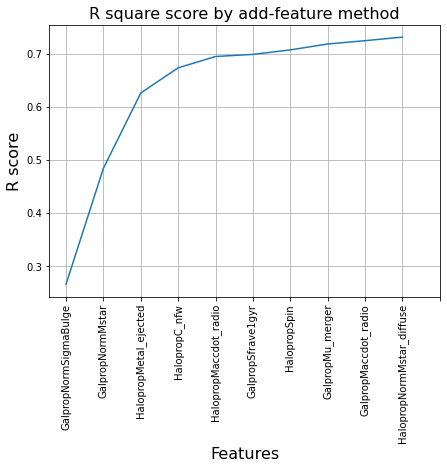

Elapsed time to run RF func on Group 9: 2114.895 seconds


In [9]:
# this code takes ... seconds ~...hrs to run when the dataset is Group 9 galaxies with 10,000 entries
# and 10 most important features
start_time = time.time()

RF_results_9 = functions.target_predicting_RF_function(X=X_9, y=y_9)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on Group 9: {elapsed_time:.3f} seconds")

##### RF best parameters for Group 9, Elliptical Galaxies with $\frac{M_{bulge}}{M_{star}}$>0.8, to predict $\frac{R_{bulge}}{R_{halo}}$ :
    Fitting 5 folds for each of 27 candidates, totalling 135 fits
    Best params, best score: 0.7296 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
    RF Accuracy: 0.73 (+/- 0.05)

For comparison, when predicting NormHalfmassRad we had:
    RF Accuracy: 0.76 (+/- 0.06)
        

#### The most important features for Group 9 galaxies to predict $\frac{R_{bulge}}{R_{halo}}$ (when $\frac{R_{disk}}{R_{halo}}$ is NOT included in the feature space) are: 

	 1 GalpropNormSigmaBulge 0.267
	 2 GalpropNormMstar 0.485
	 3 GalpropMetal_ejected 0.630
	 4 HalopropC_nfw 0.676
	 5 GalpropNormMstar_diffuse 0.687
	 6 GalpropSfrave1gyr 0.695
	 7 GalpropNormMHI 0.697
	 8 HalopropMu_merger 0.716
	 9 GalpropNormMBH 0.718
	 10 GalpropMaccdot_pristine 0.723
     
#### The most important features for Group 9 galaxies to predict $\frac{R_{bulge}}{R_{halo}}$ (when $\frac{R_{disk}}{R_{halo}}$ is included in the feature space) are: 

	 1 GalpropNormSigmaBulge 0.26519669326760203
	 2 GalpropNormMstar 0.47860330807657875
	 3 GalpropMaccdot_radio 0.6258774910047721
	 4 HalopropC_nfw 0.6817026192308657
	 5 GalpropSfrave20myr 0.6953516927975422
	 6 GalpropNormRdisk 0.7075243398167913
	 7 GalpropTmerger_major 0.7160245241740156
	 8 HalopropNormMstar_diffuse 0.7211239716185336
	 9 GalpropZstar 0.7242198097888158
	 10 GalpropSfr 0.7251926708117497

For comparison, the most important features to predict R50/Rhalo for the same group are (almost the same):

	 1 GalpropNormSigmaBulge 0.2933221120489446
	 2 GalpropNormMstar 0.5070182594774185
	 3 HalopropMaccdot_radio 0.6669119276649432
	 4 HalopropC_nfw 0.7206598254860047
	 5 GalpropSfr 0.7319530706623268
	 6 HalopropSpin 0.7430231382838445
	 7 GalpropMu_merger 0.7433078090033192
	 8 GalpropTmerger 0.7555115123434853
	 9 HalopropMetal_ejected 0.7578002165333918
	 10 GalpropNormMstar_merge 0.7620606092767703

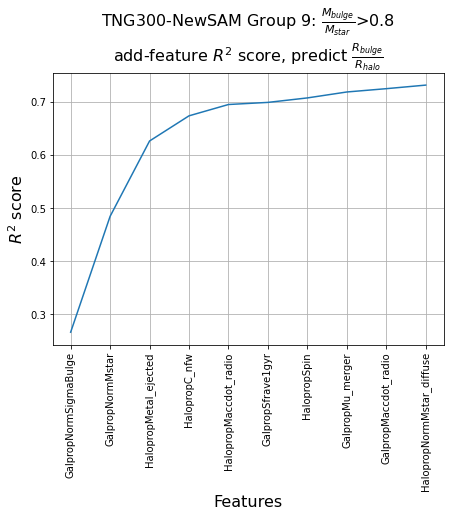

In [10]:
group9_fig_add_feature=RF_results_9[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,10))
group9_fig_add_feature.set_title(label= r'TNG300-NewSAM Group 9: $\frac{M_{bulge}}{M_{star}}$>0.8' + '\n' + r'add-feature $R^{2}$ score, predict $\frac{R_{bulge}}{R_{halo}}$',fontsize=16)
group9_fig_add_feature.set_xlabel('Features',fontsize=16)
group9_fig_add_feature.set_ylabel(r'$R^{2}$ score',fontsize=16)

# group9_fig_add_feature.get_figure().savefig('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_TNG300_Group_9_R_score_by_add_feature_method_Rbulgepred.jpg', dpi=500)

plt.show()

In [21]:
# RF_results_9[4].to_csv('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_TNG300_Group_9_Max_r_scores_by_add_column_method_Rbulgepred.csv', index=False)

group9 = pd.read_csv('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_TNG300_Group_9_Max_r_scores_by_add_column_method_Rbulgepred.csv')

group9_fig = RF_results_9[1]
# group9_fig.savefig('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_TNG300_Group_9_RF_Prediction_vs_True_Rbulgepred.jpeg', dpi=500)
plt.show()

group9_fig_builtin_imp = RF_results_9[2]
# group9_fig_builtin_imp.savefig('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_TNG300_Group_9_Built_in_Feature_Ranking_Rbulgepred.jpeg', dpi=500)
plt.show()

In [22]:
# y_pred_RF_df_9 = RF_results_9[0]
# y_pred_RF_df_9 = pd.DataFrame({'y_pred_Rbulge_RF Group 9': y_pred_RF_df_9})

# y_pred_RF_df_9.to_csv('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_TNG300-NewSAM_Group_9_y_pred_RF_predicted_Rbulge.csv', index=False)

y_pred_RF_9 = pd.read_csv('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_TNG300-NewSAM_Group_9_y_pred_RF_predicted_Rbulge.csv')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params, best score: 0.7220 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
RF Accuracy: 0.73 (+/- 0.05)


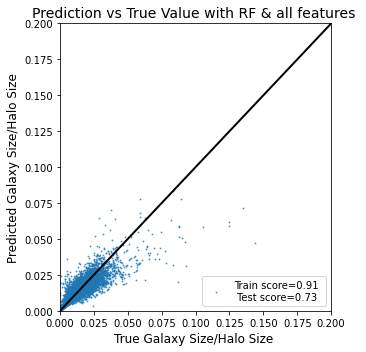

Elapsed time to compute the importances: 0.026 seconds
Elapsed time to compute the importances: 7.834 seconds


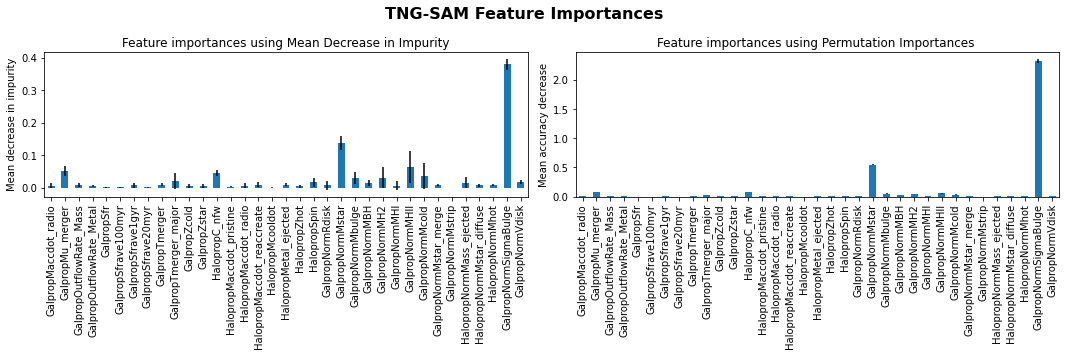

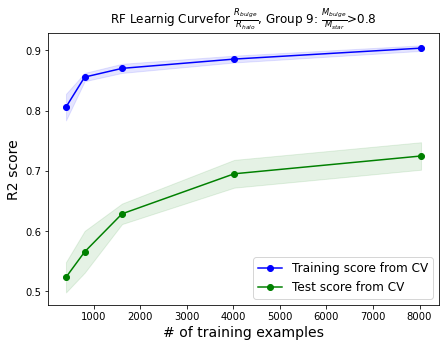

Elapsed time to run RF func and Learning Curves on Group 9 (B/M>0.8): 253.204 seconds


In [23]:
# this code takes 256.549seconds ~ 4.3min to run when the dataset is Group 9 galaxies with ~10,000 entries 
start_time = time.time()

RF_lc_9 = tp_lc_functions.target_predicting_RF_function(X_9, y_9, r'RF Learnig Curvefor $\frac{R_{bulge}}{R_{halo}}$, Group 9: $\frac{M_{bulge}}{M_{star}}$>0.8')

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func and Learning Curves on Group 9 (B/M>0.8): {elapsed_time:.3f} seconds")

In [24]:
lc_9 = RF_lc_9[4]
# lc_9.savefig('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_TNG300_Group_9_RF_Learning_Curve_Rbulgepred.jpeg', dpi=500)

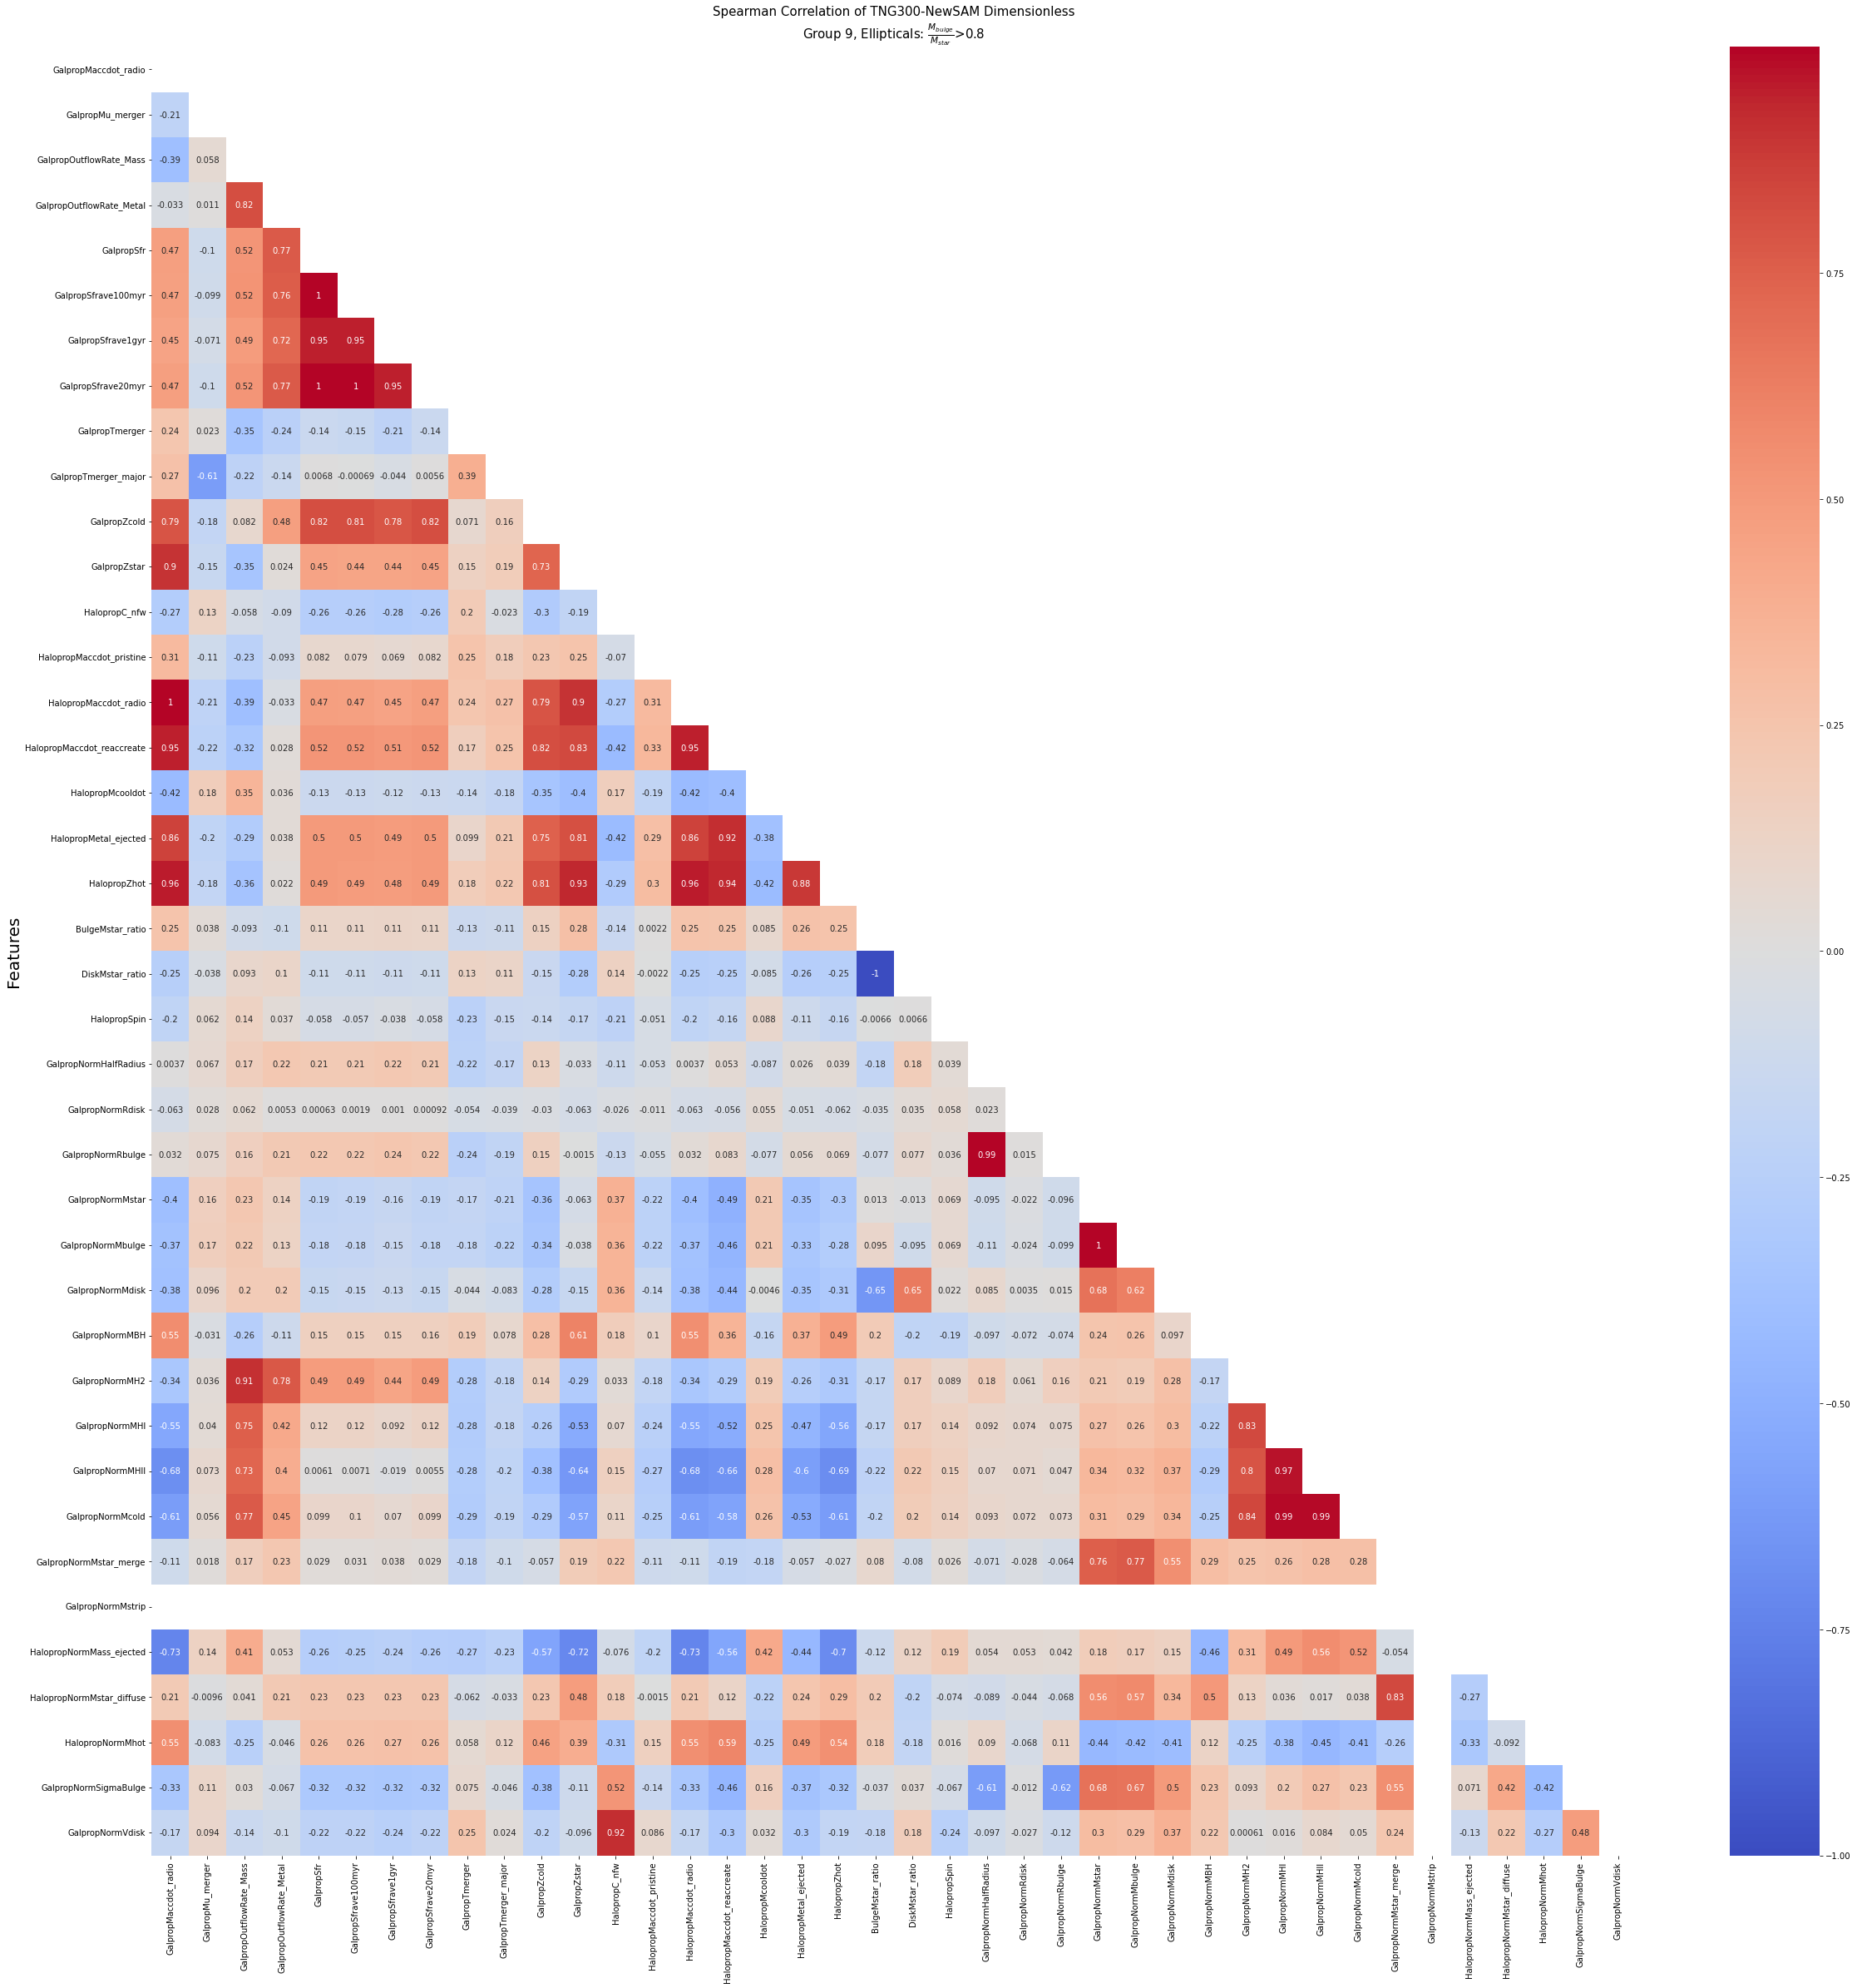

In [19]:
corr_df_9 = df_9.corr('spearman')
# corr_df = corr_df.sort_values('GalpropHalfRradius') # this is not a matrix where diagonal is 1 anymore; it only arranges half rad values from smallest to biggest
plt.figure(figsize=(40,40))
matrix = np.triu(corr_df_9) # take upper correlation matrix
sns.heatmap(corr_df_9, cmap="coolwarm",annot=True, mask=matrix)
plt.title("Spearman Correlation of TNG300-NewSAM Dimensionless\n" + r'Group 9, Ellipticals: $\frac{M_{bulge}}{M_{star}}$>0.8', fontsize = 15)
plt.ylabel("Features", fontsize = 20)
# plt.savefig('TNG300-SAM_images/v13_TNG300-SAM_df_9/v13_Group9Dimensionless_Spearman_correlation_matrix.jpeg', dpi=500)
plt.show()